# Is there difficulty variation between degrees at LSE?


#### Table of Contents


* 1) Introduction
* 2) Data Acquisition
* 3) Data Preperation
* 4) Data Analysis
* 5) Conclusion

### Introduction

Motivation

Goals + Main Questions

Originality

Quick Overview of Project Process ( improve understanding)

### Data Acquisition

Link to other notebook (main summarised tables shown here)

### Degree Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import ast

In [6]:
programms_df = pd.read_csv('data//degrees/programme_data_NDC.csv')
modules_df  = pd.read_csv('data//modules/modul_key_facts_updated.csv')

In [7]:
programms_df.head()

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary
0,BA Anthropology and Law,AAB,NaN,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20,13:1,"£9,535","£34,500"
1,BA Geography,AAA,NaN,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38,10:1,"£9,535","£35,000"
2,BA History,AAA,NaN,"['HY120', 'LSE100']",[],['HY300'],503.0,58,9:1,"£9,535","£35,000"
3,BA Social Anthropology,AAB,NaN,"['AN100', 'AN101', 'AN102', 'LSE100']",['AN286'],['AN397'],232.0,30,8:1,"£9,535","£34,500"
4,BSc Accounting and Finance,AAA,with A in Mathematics,"['LSE100', 'AC105', 'AC106', 'ST107', 'FM101']","['AC205', 'AC206']","['AC331', 'AC311', 'FM310', 'FM311']",2283.0,140,16:1,"£9,535","£35,000"


In [8]:
programms_df.isnull().sum()

degree              0
a_lvl_req           0
a_lvl_extra        17
modules_y1          0
modules_y2          0
modules_y3          0
nr_applications     2
intake              2
ratio               2
home_fee            1
median_salary       3
dtype: int64

In [9]:
programms_df_clean = programms_df

In [10]:
programms_df_clean['a_lvl_extra'] = programms_df_clean['a_lvl_extra'].fillna('None')

print("Missing values in 'a_lvl_extra' after replacement:")
print(programms_df_clean['a_lvl_extra'].isnull().sum())

Missing values in 'a_lvl_extra' after replacement:
0


In [11]:
programms_df_clean.dropna(subset=['median_salary'], inplace=True)

print("Remaining missing values:\n", programms_df_clean.isnull().sum())

Remaining missing values:
 degree             0
a_lvl_req          0
a_lvl_extra        0
modules_y1         0
modules_y2         0
modules_y3         0
nr_applications    2
intake             2
ratio              2
home_fee           0
median_salary      0
dtype: int64


In [12]:
programms_df_clean['intake'] = programms_df_clean['intake']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)
programms_df_clean['nr_applications'] = programms_df_clean['nr_applications']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)

programms_df_clean['intake'] = pd.to_numeric(
    programms_df_clean['intake'], errors='coerce'
)
programms_df_clean['nr_applications'] = pd.to_numeric(
    programms_df_clean['nr_applications'], errors='coerce'
)

In [13]:
programms_df_clean['acceptance_perc'] = (programms_df_clean['intake']/programms_df_clean['nr_applications']).round(5)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535","£34,500",0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38.0,10:1,"£9,535","£35,000",0.10080
2,BA History,AAA,None,"['HY120', 'LSE100']",[],['HY300'],503.0,58.0,9:1,"£9,535","£35,000",0.11531


In [14]:
programms_df_clean['median_salary'] = programms_df_clean['median_salary'].str.replace(',', '').str.replace('£', '').astype(float)

In [15]:
columns_to_drop = ['nr_applications', 'intake', 'ratio', 'home_fee']
programms_df_clean.drop(columns=columns_to_drop, inplace=True)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],34500.0,0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],35000.0,0.10080
2,BA History,AAA,None,"['HY120', 'LSE100']",[],['HY300'],35000.0,0.11531


In [16]:
modules_df.head(3)

,code,course,department,total_students,avg_class_size,capped,units
0,AC102,Elements of Financial Accounting,Accounting,564.0,15.0,False,0.5
1,AC103,"Elements of Management Accounting, Financial M...",Accounting,256.0,18.0,False,0.5
2,AC105,Introduction to Financial Accounting,Accounting,115.0,39.0,False,0.5


In [17]:
module_units_dict = modules_df.set_index('code')['units'].to_dict()
def parse_module_list(module_string):
    try:
        if isinstance(module_string, str):
            parsed_list = ast.literal_eval(module_string)
            return parsed_list if isinstance(parsed_list, list) else []
        elif isinstance(module_string, list):
             return module_string
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []


programms_df_clean['modules_y1'] = programms_df_clean['modules_y1'].apply(parse_module_list)
programms_df_clean['modules_y2'] = programms_df_clean['modules_y2'].apply(parse_module_list)
programms_df_clean['modules_y3'] = programms_df_clean['modules_y3'].apply(parse_module_list)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531


In [18]:
def calculate_total_units(df, module_col_name, units_dict):
    total_units_list = []
    warnings_issued = set() 

    for modules in df[module_col_name]:
        programm_unit_sum = 0
        if isinstance(modules, list): 
            for module in modules:
                unit_value = units_dict.get(module, 0)

                if module not in units_dict and module not in warnings_issued:
                     warnings_issued.add(module)
                    
                programm_unit_sum += unit_value

        total_units_list.append(programm_unit_sum)

    return total_units_list

y1_unit_sums = calculate_total_units(programms_df_clean, 'modules_y1', module_units_dict)
programms_df_clean['y1_total_units'] = y1_unit_sums

y2_unit_sums = calculate_total_units(programms_df_clean, 'modules_y2', module_units_dict)
programms_df_clean['y2_total_units'] = y2_unit_sums

y3_unit_sums = calculate_total_units(programms_df_clean, 'modules_y3', module_units_dict)
programms_df_clean['y3_total_units'] = y3_unit_sums

programms_df_clean.head(5)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc,y1_total_units,y2_total_units,y3_total_units
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000,4.5,3.0,1.0
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080,3.5,1.5,1.0
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531,1.5,0.0,1.0
3,BA Social Anthropology,AAB,None,"[AN100, AN101, AN102, LSE100]",[AN286],[AN397],34500.0,0.12931,3.5,1.0,1.0
4,BSc Accounting and Finance,AAA,with A in Mathematics,"[LSE100, AC105, AC106, ST107, FM101]","[AC205, AC206]","[AC331, AC311, FM310, FM311]",35000.0,0.06132,2.5,1.0,2.0


In [19]:
programms_df_clean['total_compulsory_units'] = ( programms_df_clean['y1_total_units'] + programms_df_clean['y2_total_units'] + programms_df_clean['y3_total_units'])
programms_df_clean['total_optional_units'] = 12.5 - programms_df_clean['total_compulsory_units']
top5_optional = (programms_df_clean[['degree', 'total_optional_units']].nlargest(5, 'total_optional_units').reset_index(drop=True))
bot5_optional = (programms_df_clean[['degree', 'total_optional_units']].nsmallest(5, 'total_optional_units').reset_index(drop=True))

pd.concat([top5_optional, bot5_optional], axis=1, keys=['Top 5 Optional Units', 'Bottom 5 Optional Units'])

Top 5 Optional Units                       \
                                    degree total_optional_units   
0  BSc International Relations and History                 11.0   
1                               BA History                 10.0   
2                 BSc History and Politics                 10.0   
3              BSc International Relations                 10.0   
4                             BSc Politics                 10.0   

                     Bottom 5 Optional Units                       
                                      degree total_optional_units  
0                                BSc Finance                  2.0  
1   BSc Financial Mathematics and Statistics                  2.0  
2  BSc Psychological and Behavioural Science                  3.5  
3                    BA Anthropology and Law                  4.0  
4         BSc Economic History and Geography                  4.0

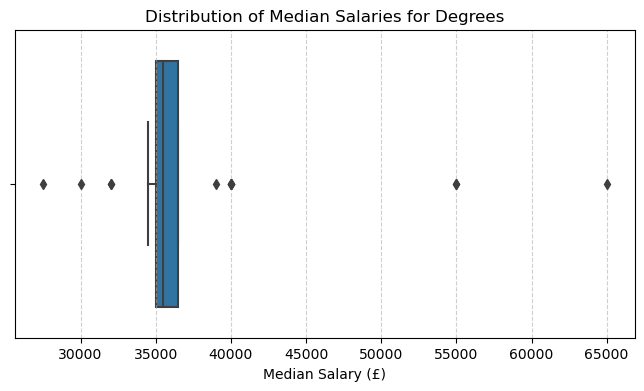

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=programms_df_clean['median_salary'])
plt.title('Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()

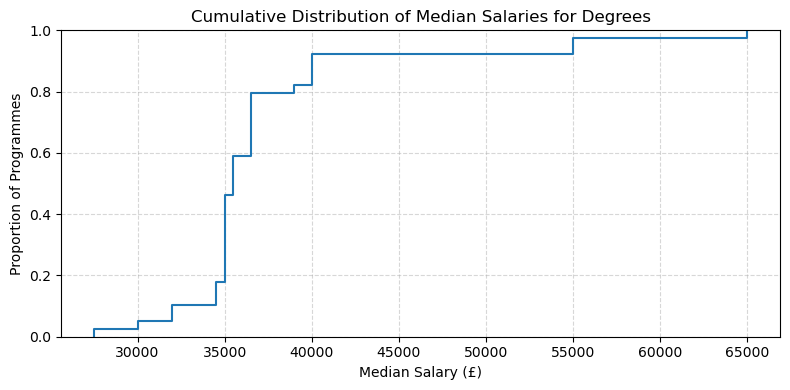

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.ecdfplot(data=programms_df_clean, x='median_salary')
plt.title('Cumulative Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.ylabel('Proportion of Programmes')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
top5 = programms_df_clean.nlargest(5, 'median_salary')[['degree', 'median_salary']]\
           .reset_index(drop=True)
bottom5 = programms_df_clean.nsmallest(5, 'median_salary')[['degree', 'median_salary']]\
              .reset_index(drop=True)

top5.columns = ['Top 5 Degrees', 'Top Salaries (£)']
bottom5.columns = ['Bottom 5 Degrees', 'Bottom Salaries (£)']

pd.concat([top5, bottom5], axis=1)

,Top 5 Degrees,Top Salaries (£),Bottom 5 Degrees,Bottom Salaries (£)
0,BSc Finance,65000.0,BSc International Relations,27500.0
1,BSc Econometrics and Mathematical Economics,55000.0,BSc Sociology,30000.0
2,BSc Economics,55000.0,BSc International Social and Public Policy,32000.0
3,BSc Financial Mathematics and Statistics,40000.0,BSc International Social and Public Policy wit...,32000.0
4,BSc Mathematics and Economics,40000.0,BA Anthropology and Law,34500.0


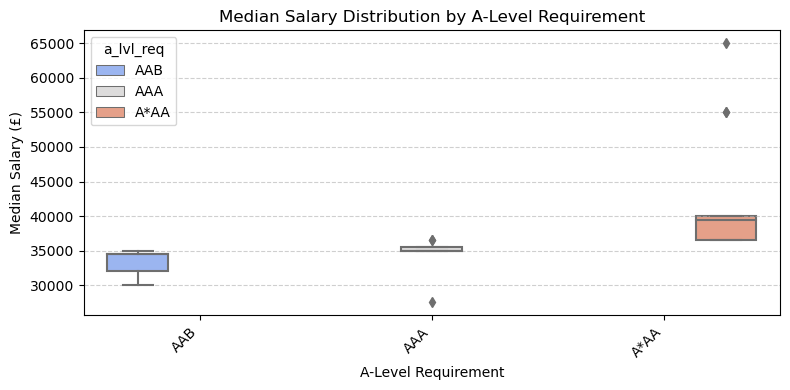

In [24]:
requirement_order = sorted(programms_df_clean['a_lvl_req'].unique(), reverse=True) 
plt.figure(figsize=(8,4))
sns.boxplot(data=programms_df_clean, x='a_lvl_req', y='median_salary', order=requirement_order, palette='coolwarm', hue='a_lvl_req')

plt.title('Median Salary Distribution by A-Level Requirement')
plt.xlabel('A-Level Requirement')
plt.ylabel('Median Salary (£)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

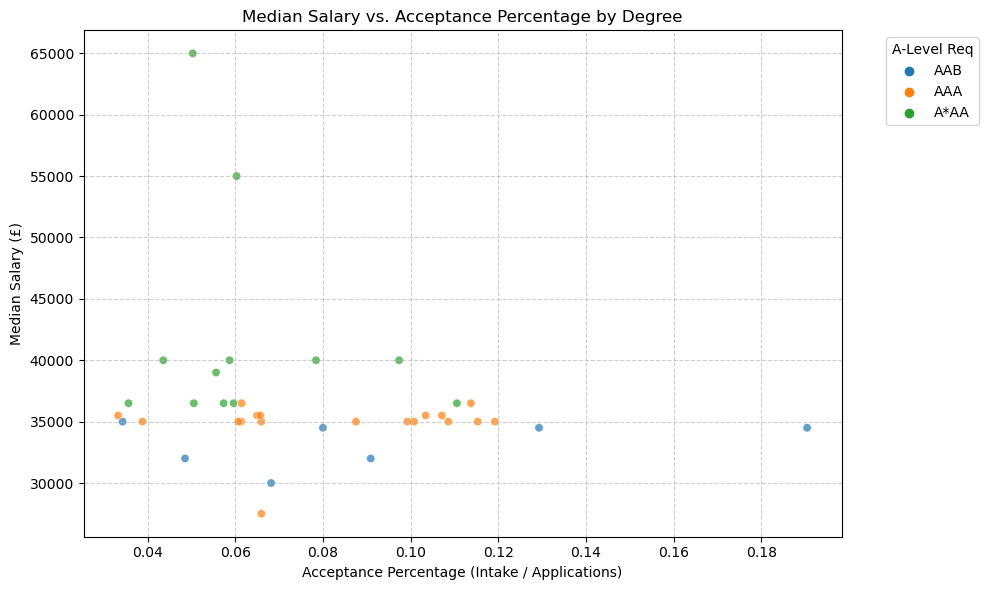

Correlation between Acceptance Percentage and Median Salary: -0.19


In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=programms_df_clean, x='acceptance_perc', y='median_salary', hue='a_lvl_req', alpha=0.7)

plt.title('Median Salary vs. Acceptance Percentage by Degree')
plt.xlabel('Acceptance Percentage (Intake / Applications)')
plt.ylabel('Median Salary (£)')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(title='A-Level Req', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = programms_df_clean['acceptance_perc'].corr(programms_df_clean['median_salary'])
print(f"Correlation between Acceptance Percentage and Median Salary: {correlation:.2f}")

### Module Data Preperation


One of the largest challenges of this projects was creating and finding the combinations of optional modules for the degrees to work out the easiest and hardest possible combinations. This came from the fact that the degrees are very very different from each other and there are lots of different types of optional modules a student can choose. There are outside options, but they all have prerequsities and mutually exclusive courses meaning that the optional modules a student choose influence if the student can take certain outside options. So we had to try keep it as general as possible and realised that we only can possiblly analyse a few degrees

#### Preparing Module Table and Outside Option Table

In [35]:
marks_df = pd.read_csv('data/modules/marks_summary_modules.csv')


marks_df = marks_df[marks_df['code'].isin(marks_df[marks_df['year'] == '2023/24']['code'].unique())]
# We only looked at courses which existed in 23.24


summary_df = marks_df.groupby('code').apply(
    lambda group: pd.Series({
        'mean': np.average(group['mean'], weights=group['marks']) if group['marks'].sum() > 0 else np.nan,
        'q10': group['q10'].mean() if group['marks'].sum() > 0 else np.nan,
        'Median': group['median'].mean() if group['marks'].sum() > 0 else np.nan,
        'q90': group['q90'].mean() if group['marks'].sum() > 0 else np.nan,
        'Pooled_SD': ( np.sqrt(((group['marks'] - 1) * group['sd'] ** 2).sum() / (group['marks'].sum() - len(group)))
        if group['marks'].sum() - len(group) > 0 else np.nan),
        
    })
).reset_index()


module_facts_df = pd.read_csv("data/modules/modul_key_facts_updated.csv")
summary_df = summary_df.merge(module_facts_df[['code', 'units']], on='code', how='left')


outside_options = pd.read_csv('data/modules/outside_options.csv')


outside_options_marks = outside_options.merge(summary_df,left_on='code',right_on='code',how='left')

def parse_list_string(s):
    if pd.isna(s) or s.strip() == '[]':
        return []
    return [item.strip().strip("'\"") for item in s.strip('[]').split(',')]

outside_options_marks.drop(columns=['course', 'total_students', 'avg_class_size', 'capped'], inplace=True)

outside_options_marks.sort_values(by='mean', ascending=False, inplace=True)
outside_options_marks['parsed_prereqs'] = outside_options_marks['prerequisites'].apply(parse_list_string)
outside_options_marks['parsed_exclusions'] = outside_options_marks['mutually_exclusive_courses'].apply(parse_list_string)
outside_options_marks[["code",'units_x','department','mean','q10','Median','q90','Pooled_SD','parsed_prereqs','parsed_exclusions']].head()


,code,units_x,department,mean,q10,median,q90,Pooled_SD,parsed_prereqs,parsed_exclusions
67,EC336,0.5,Economics,81.200000,71.500,82.500,89.500,8.300000,"[ST102, MA100, ST109]",[]
69,EC338,0.5,Economics,75.300000,51.200,80.000,91.000,18.600000,"[EC201, EC202]",[]
231,LN200,1.0,Language Centre,74.455556,72.525,74.625,75.925,2.844996,[LN100],[]
252,MA209,0.5,Mathematics,74.407551,55.860,75.100,91.980,14.521311,"[MA203, MA212, MA103, MA102, MA100]",[]
38,DS105A,0.5,Data Science Institute,73.800000,62.800,76.000,84.000,9.700000,[],[DS105W]


In [29]:
compulsory_mods_lse_df =pd.read_csv('data/degrees/programme_data_NDC.csv')
compulsory_mods_lse_df['modules_y1'] = compulsory_mods_lse_df['modules_y1'].apply(parse_list_string)
compulsory_mods_lse_df['modules_y2'] = compulsory_mods_lse_df['modules_y2'].apply(parse_list_string)
compulsory_mods_lse_df['modules_y3'] = compulsory_mods_lse_df['modules_y3'].apply(parse_list_string)
compulsory_mods_lse_df['modules'] = compulsory_mods_lse_df['modules_y1'] + compulsory_mods_lse_df['modules_y2'] +compulsory_mods_lse_df['modules_y3']

def calculate_statistics_for_modules(module_list, summary_df):
    
    selected_modules = summary_df[summary_df['code'].isin(module_list)].copy()

    
    if selected_modules.empty:
        return None, None, None, None, None

    
    if 'units' not in selected_modules.columns:
        raise ValueError("summary_df must include a 'units' column to calculate weighted averages.")

    
    weights = selected_modules['units']
    total_weight = weights.sum()

    mean_value = (selected_modules['mean'] * weights).sum() / total_weight
    q10_value = (selected_modules['q10'] * weights).sum() / total_weight
    median_value = (selected_modules['Median'] * weights).sum() / total_weight
    q90_value = (selected_modules['q90'] * weights).sum() / total_weight
    pooled_sd_value = (selected_modules['Pooled_SD'] * weights).sum() / total_weight

    return mean_value, q10_value, median_value, q90_value, pooled_sd_value

compulsory_mods_lse_df[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = compulsory_mods_lse_df['modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    ))

compulsory_mods_lse_df = compulsory_mods_lse_df.sort_values(by='Mean', ascending=False)
compulsory_mods_lse_df[["degree","Mean","Median","Q10","Q90","Pooled_SD"]].head()

,degree,Mean,Median,Q10,Q90,Pooled_SD
38,BSc Psychological and Behavioural Science,67.489256,67.813725,61.38451,74.111471,7.108308
9,BSc Economic History and Geography,67.160631,67.875000,58.02000,76.800000,9.195954
22,BSc International Social and Public Policy,66.251064,66.857143,59.00000,73.725714,7.812077
2,BA History,66.174879,67.275000,58.00000,73.542500,8.646911
32,BSc Philosophy Logic and Scientific Method,66.040740,67.995000,56.29200,75.436000,11.273243


In [36]:
outside_options_1st_year = outside_options_marks.copy()
outside_options_1st_year['course year'] = outside_options_1st_year['code'].str[2].astype(float)
outside_options_1st_year = outside_options_1st_year[outside_options_1st_year['course year'] == 1.0]
outside_options_1st_year = outside_options_1st_year.dropna(subset=['mean'])
outside_options_1st_year[["code",'units_x','department','mean','q10','Median','q90','Pooled_SD','parsed_prereqs','parsed_exclusions']].head()

,code,units_x,department,mean,q10,median,q90,Pooled_SD,parsed_prereqs,parsed_exclusions
38,DS105A,0.5,Data Science Institute,73.800000,62.80,76.000000,84.000000,9.700000,[],[DS105W]
0,AC102,0.5,Accounting,71.771288,52.62,74.800000,87.580000,14.904358,[],[]
39,DS105W,0.5,Data Science Institute,70.400000,59.00,73.000000,78.000000,8.000000,[],[DS104A]
347,ST115,0.5,Statistics,70.102410,55.10,70.833333,85.766667,13.730301,"[ST102, ST107, ST109]",[]
326,SP112,1.0,Social Policy,69.999363,64.08,70.700000,75.640000,5.477388,[],[]


#### Discovering the Easiest and Hardest Degree Designs

##### Finance

We begin with Finance (our degree), where we look and define most of the functions we will use for the rest of the degrees

In [37]:
finance_options = pd.read_csv("data/degrees/financem.csv")
finance_options.head(5)

,Module,Year,Optional/Compulsory,Prerequisites,Units
0,MA108,1.0,0,0.0,0.5
1,FM100,1.0,0,0.0,0.5
2,FM102,1.0,0,0.0,0.5
3,EC1A3,1.0,0,0.0,0.5
4,EC1B3,1.0,0,0.0,0.5


In [38]:
def summarize_compulsory_modules(df, standard_units_per_year=4,):
    df = df.copy()

    
    df['Units'] = pd.to_numeric(df['Units'], errors='coerce')
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
    df['Module'] = df['Module'].astype(str)

    
    compulsory_df = df[df['Optional/Compulsory'] == 0]

    
    oo_df = df[df['Module'].str.upper().str.contains('OO')]

  
    
    comp_units_by_year = compulsory_df.groupby('Year')['Units'].sum().to_dict()
    oo_units_by_year = oo_df.groupby('Year')['Units'].sum().to_dict()

    
    remaining_units = {}
    oo_unit_columns = {}
    
    for year in [1, 2, 3]:
        comp = comp_units_by_year.get(year, 0)
        oo = oo_units_by_year.get(year, 0)
        remaining = standard_units_per_year - comp - oo
        
        remaining_units[f'Year {year} Non-OO Units Needed'] = max(0, round(remaining, 2))
        oo_unit_columns[f'Year {year} OO Units'] = round(oo, 2)

    
    result = {
        'Compulsory Modules': compulsory_df['Module'].tolist(),
        'Total Compulsory Units': round(compulsory_df['Units'].sum(), 2),
        **oo_unit_columns,
        **remaining_units
    }

    return pd.DataFrame([result])

initial_combinations_dffi = summarize_compulsory_modules(finance_options)
initial_combinations_dffi

,Compulsory Modules,Total Compulsory Units,Year 1 OO Units,Year 2 OO Units,Year 3 OO Units,Year 1 Non-OO Units Needed,Year 2 Non-OO Units Needed,Year 3 Non-OO Units Needed
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0.5,0.5,1.0


In [40]:
from itertools import combinations

def generate_year1_optional_combinations(base_summary_df, all_modules_df, standard_units_per_year=4):
    base_summary = base_summary_df.iloc[0].copy()  
    needed_units = base_summary['Year 1 Non-OO Units Needed']

    if needed_units <= 0:
        return pd.DataFrame([base_summary])  

    
    filtered_df = all_modules_df[
        (all_modules_df['Optional/Compulsory'] == 1) &
        (all_modules_df['Year'] == 1) &
        (~all_modules_df['Module'].str.upper().str.contains('OO'))
    ]

    modules_list = filtered_df[['Module', 'Units']].dropna().values.tolist()

    
    valid_combinations = []
    for r in range(1, len(modules_list) + 1):
        for combo in combinations(modules_list, r):
            total = sum(unit for _, unit in combo)
            if round(total, 2) == round(needed_units, 2):
                valid_combinations.append(combo)

    result_rows = []

    for combo in valid_combinations:
        optional_modules = [mod for mod, _ in combo]
        optional_units = sum(unit for _, unit in combo)
        
        
        combined_modules = base_summary['Compulsory Modules'] + optional_modules
        
        
        updated_row = base_summary.copy()
        updated_row['Modules'] = combined_modules
        updated_row['Optional Modules Added'] = optional_modules
        updated_row['Total Units'] = round(base_summary['Total Compulsory Units'] + optional_units, 2)

        
        updated_row['Year 1 Non-OO Units Needed'] = 0
        
        result_rows.append(updated_row)

    return pd.DataFrame(result_rows)

year1_combos_dffi = generate_year1_optional_combinations(initial_combinations_dffi, finance_options)
year1_combos_dffi2 =year1_combos_dffi
year1_combos_dffi2 

,Compulsory Modules,Total Compulsory Units,Year 1 OO Units,Year 2 OO Units,Year 3 OO Units,Year 1 Non-OO Units Needed,Year 2 Non-OO Units Needed,Year 3 Non-OO Units Needed,Modules,Optional Modules Added,Total Units
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5


In [41]:
def create_difficulty_subrows(year1_combos_dfirf):
    # Create a new empty list to store the subrows
    subrows = []
    
    # Iterate through each row of the dataframe
    for _, row in year1_combos_dfirf.iterrows():
        # For each row, we create three subrows with different difficulty levels
        for difficulty in ['Hard', 'Medium', 'Easy']:
            # Copy the row, and add the 'Difficulty' column
            subrow = row.copy()
            subrow['Difficulty'] = difficulty
            subrows.append(subrow)
    
    # Convert the list of subrows back into a DataFrame
    year1_combos_dfirf_expanded = pd.DataFrame(subrows)
    
    return year1_combos_dfirf_expanded
year_1_combos_dffi3 = create_difficulty_subrows(year1_combos_dffi2)
year_1_combos_dffi4=year_1_combos_dffi3.copy()
year_1_combos_dffi4

,Compulsory Modules,Total Compulsory Units,Year 1 OO Units,Year 2 OO Units,Year 3 OO Units,Year 1 Non-OO Units Needed,Year 2 Non-OO Units Needed,Year 3 Non-OO Units Needed,Modules,Optional Modules Added,Total Units,Difficulty
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Hard
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Medium
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[AC102],10.5,Easy
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Hard
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Medium
0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",10.0,0,0,0,0,0.5,1.0,"[MA108, FM100, FM102, EC1A3, EC1B3, ST102, FM2...",[ST101],10.5,Easy


In [42]:
def print_sorted_by_mean(dataframe, num=5):
   
    # Step 1: Drop rows with NaN values in 'mean' column
    dataframe_clean = dataframe.dropna(subset=['mean'])

    # Step 2: Sort by 'mean' to identify the highest, lowest, and median mean
    sorted_df = dataframe_clean.sort_values(by='mean')

    # Step 3: Get the lowest, median, and highest rows
    lowest_index_start = 0
    lowest_index_end = num
    lowest_rows = sorted_df.iloc[lowest_index_start: lowest_index_end]

    median_index_start = len(sorted_df) // 2 - num // 2
    median_index_end = len(sorted_df) // 2 + num // 2 + (num % 2)
    median_rows = sorted_df.iloc[median_index_start: median_index_end]

    highest_index_start = len(sorted_df) - num
    highest_index_end = len(sorted_df)
    highest_rows = sorted_df.iloc[highest_index_start: highest_index_end]

    # Step 4: Output the results
    print(f"Lowest {num} mean rows:")
    print(lowest_rows[['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units']])

    print(f"\nMedian {num} mean rows:")
    print(median_rows[['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units']])

    print(f"\nHighest {num} mean rows:")
    print(highest_rows[['code', 'mean', 'prerequisites', 'mutually_exclusive_courses','units']])

print_sorted_by_mean(year_1_combos_dffi4.iloc[0,0],num=5)

AttributeError: 'list' object has no attribute 'dropna'

In [ ]:
#print_sorted_by_mean(valid_outside_options_ST101_clean,num=5)

In [43]:
def expand_with_difficulty_variants(year1_combos_df, difficulty_df):
    expanded_rows = []

    for _, row in year1_combos_df.iterrows():
        base_modules = row['Modules']
        base_optionals = row['Optional Modules Added']

        for _, diff_row in difficulty_df.iterrows():
            if sorted(diff_row['Optional Modules Added']) == sorted(base_optionals):
                new_row = row.copy()

                # Append OO modules to Optional Modules Added (instead of having OO_added as a separate column)
                new_optionals = base_optionals + diff_row['OO_added']
                new_modules = base_modules + diff_row['OO_added']

                # Create new expanded row
                expanded_rows.append({
                    'Modules': new_modules,
                    'Optional Modules Added': new_optionals,
                    'Difficulty': diff_row['Difficulty'],
                    # Preserve other original fields
                    **{col: row[col] for col in row.index if col not in ['Modules', 'Optional Modules Added']}
                })

    return pd.DataFrame(expanded_rows)

In [50]:
difficulty_dffi = pd.DataFrame([
    {'Difficulty': 'Hard','Optional Modules Added': ['AC102'],'OO_added': ['MA102', 'AC332', 'EC339']},
    {'Difficulty': 'Medium', 'Optional Modules Added': ['AC102'], 'OO_added': [ 'AC342', 'LL251']}, 
    {'Difficulty': 'Easy',   'Optional Modules Added': ['AC102'], 'OO_added': ['DS105A', 'EH209']},
    {'Difficulty': 'Hard', 'Optional Modules Added': ['ST101'],'OO_added':[ 'MA102', 'LL106']  }, 
    {'Difficulty': 'Medium',  'Optional Modules Added': ['ST101'],  'OO_added': ['AN237', 'LL251'] },
    {'Difficulty': 'Easy', 'Optional Modules Added': ['ST101'], 'OO_added': ['DS105A', 'ST310', 'ST311'] }
])


finance_combos = expand_with_difficulty_variants(year_1_combos_dffi4, difficulty_dffi)

In [51]:
finance_combos = finance_combos.loc[[0, 4, 8, 9, 13, 17]] 

finance_combos[['Mean', 'Q10', 'median', 'Q90', 'Pooled_SD']] = finance_combos['Modules'].apply(
    lambda x: pd.Series(calculate_statistics_for_modules(x, summary_df))
)
finance_combos["degree"] = "Finance"
finance_combos[["Modules","Difficulty","Mean","median","Q10","Q90","Pooled_SD","degree"]]


KeyError: 'Median'

In [ ]:
import matplotlib.pyplot as plt
n = len(manual_combinations_df)
fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), constrained_layout=True)
if n == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    row = manual_combinations_df.iloc[i]

    mean = row['Mean']
    sd = row['Pooled_SD']
    median = row['Median']
    q10_actual = row['Q10']
    q90_actual = row['Q90']
    module_name = row['Modules']

    # Predicted Q10 and Q90 using z = ±1.28
    q10_pred = mean - 1.28 * sd
    q90_pred = mean + 1.28 * sd

    # Plot actual IPR as a bar
    ax.broken_barh([(q10_actual, q90_actual - q10_actual)], (0.4, 0.2), facecolors='lightblue', edgecolor='black', label='Actual IPR')

    # Horizontal midline
    ax.axhline(0.5, color='gray', linestyle='-', linewidth=0.5)

    # Vertical lines
    ax.axvline(mean, color='red', linestyle='-', linewidth=1.5, label='Mean')
    ax.axvline(median, color='black', linestyle='--', label='Median')
    ax.axvline(q10_actual, color='blue', linestyle='--', label='Q10 Actual')
    ax.axvline(q90_actual, color='blue', linestyle='--', label='Q90 Actual')

    # Predicted Q10 and Q90
    ax.axvline(q10_pred, color='green', linestyle=':', label='Q10 Predicted')
    ax.axvline(q90_pred, color='green', linestyle=':', label='Q90 Predicted')

    # Labels & title
    ax.set_title(f'Module: {module_name} - IPR (Q90 - Q10)', fontsize=12)
    ax.set_yticks([])
    ax.set_xlim(min(q10_actual, q10_pred) - 10, max(q90_actual, q90_pred) + 10)
    ax.legend(loc='upper right')

plt.suptitle('Interpercentile Range (IPR) with Predicted vs Actual Quantiles', fontsize=16)
;

In [ ]:
econ_options = pd.read_csv("data/degrees/econm.csv")
econ_options.head()

In [ ]:


initial_combinations_df3 = summarize_compulsory_modules(econ_options,)
initial_combinations_df3

In [ ]:
year1_combos_df = generate_year1_optional_combinations(initial_combinations_df3, econ_options)
year1_combos_df

In [ ]:
difficulty_df = pd.DataFrame([
    {'Difficulty': 'Hard','Optional Modules Added': ['MA100'],'OO_added': ['MA102',"ST101A"]}, {'Difficulty': 'Medium',
        'Optional Modules Added': ['MA100'], 'OO_added': ['PH103']}, {'Difficulty': 'Easy', 'Optional Modules Added': ['MA100'],
        'OO_added': ['DS105A', 'AC102'] }, {'Difficulty': 'Hard', 'Optional Modules Added': ['MA108', 'EC1B1'],
        'OO_added': ['MA102',"ST101A"] }, {    'Difficulty': 'Medium',  'Optional Modules Added': ['MA108', 'EC1B1'],
        'OO_added': ['PH103'] }, { 'Difficulty': 'Easy', 'Optional Modules Added': ['MA108', 'EC1B1'], 'OO_added': ['DS105A', 'AC102'] }
])

In [ ]:
year_1incOO_df = expand_with_difficulty_variants(year1_combos_df, difficulty_df)






In [ ]:
import pandas as pd

def add_summary_and_prereqs(econ_options, summary_df, outside_options_marks):
    # Merge econ_options with summary_df based on matching 'Module' and 'code'
    merged_df = pd.merge(econ_options, summary_df, left_on='Module', right_on='code', how='left')

    # Merge econ_options with outside_options_marks to get prerequisites and exclusions
    merged_with_outside = pd.merge(merged_df, outside_options_marks[['code', 'parsed_prereqs', 'parsed_exclusions']],
                                   left_on='Module', right_on='code', how='left')


    # Drop the unnecessary 'code' column after merging, as we already have 'Module'
    if 'code' in merged_with_outside.columns:
        merged_with_outside = merged_with_outside.drop(columns=['code'])
    
    # Return the final merged DataFrame
    return merged_with_outside


merged_df_e = add_summary_and_prereqs(econ_options, summary_df,outside_options_marks)

merged_df_e3= merged_df_e[merged_df_e['Year'] == 3]
merged_df_e3 = merged_df_e3.sort_values(by='mean', ascending=False)
merged_df_e3 = merged_df_e3.dropna(subset=['mean'])
merged_df_e3 = merged_df_e3[~merged_df_e3['Module'].isin(['FM322', 'FM321'])]
merged_df_e3.head()

In [ ]:
import pandas as pd
from itertools import combinations
import numpy as np

def find_mean_of_means_combinations(df, target_units=4.0, code_col='Module', mean_col='mean', unit_col='Units'):
    valid_combos = []

    # Loop through all possible course combinations
    for r in range(1, len(df) + 1):
        for combo in combinations(df.itertuples(index=False), r):
            total_units = sum(getattr(c, unit_col) for c in combo)
            if np.isclose(total_units, target_units):
                mean_scores = [getattr(c, mean_col) for c in combo]
                avg_mean = np.mean(mean_scores)
                combo_df = pd.DataFrame(combo)
                combo_df['mean_of_means'] = avg_mean
                combo_df['combo_codes'] = ", ".join(getattr(c, code_col) for c in combo)
                valid_combos.append((combo_df, avg_mean))

    if not valid_combos:
        return {"lowest": None, "median": None, "highest": None}

    # Sort combos by "mean of means"
    sorted_combos = sorted(valid_combos, key=lambda x: x[1])
    mid_index = len(sorted_combos) // 2

    return {
        "lowest": sorted_combos[0][0].reset_index(drop=True),
        "median": sorted_combos[mid_index][0].reset_index(drop=True),
        "highest": sorted_combos[-1][0].reset_index(drop=True)
    }

# Step 3: Run the function
result = find_mean_of_means_combinations(merged_df_e3, target_units=4.0)


#Step 4: Display the DataFrames
#print("🔻 Lowest Mean of Means Combo:")
#display(result['lowest'])

#print("🔘 Median Mean of Means Combo:")
#display(result['median'])

#print("🔺 Highest Mean of Means Combo:")
#display(result['highest'])

In [ ]:
append_dict = {
    'Hard': ['EC302','EC310','EC337','EC319','EC335','MA212'],
    'Medium': ['EC338','EC313','EC321','EC311','EC339','HY206'],
    'Easy': ['EC336','EC338','EC307','PH311','EC330','LN200']
}
year_1incOO_df2 = year_1incOO_df.copy()
for difficulty, additions in append_dict.items():
    mask = year_1incOO_df2['Difficulty'] == difficulty
    
    # Only add new items not already present in the lists
    year_1incOO_df2.loc[mask, 'Modules'] = year_1incOO_df2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year_1incOO_df2.loc[mask, 'Optional Modules Added'] = year_1incOO_df2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
update_total_units(year_1incOO_df2, summary_df)
print("Units Updated")

In [ ]:
year_1incOO_df2[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year_1incOO_df2['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year_1incOO_df2["degree"] = "Economics"
year_1incOO_df2[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]


In [ ]:
ir_options = pd.read_csv("data/degrees/irm.csv")
ir_options.head()


In [ ]:
initial_combinations_dfir = summarize_compulsory_modules(ir_options,)


In [ ]:
year1_combos_dfir = generate_year1_optional_combinations(initial_combinations_dfir, ir_options)
                                                              
                                                                                                                                                         

In [ ]:
year1_combos_dfirf = year1_combos_dfir[year1_combos_dfir['Optional Modules Added'].isin([[ 'HY113', 'HY116' ], [ 'HY113', 'EH101' ],
[ 'HY113', 'GV101' ],[ 'HY113', 'PH103' ],[ 'HY113', 'SO100' ],[ 'HY116', 'EH101' ],[ 'HY116', 'GV101' ],[ 'HY113', 'PH103' ],
['HY113', 'SO10O' ]])]
   

In [ ]:
merged_df_ir = add_summary_and_prereqs(ir_options, summary_df,outside_options_marks)

merged_df_ir3= merged_df_ir[merged_df_ir['Year'] == 3]
merged_df_ir3 = merged_df_ir3.sort_values(by='mean', ascending=False)
merged_df_ir3 = merged_df_ir3.dropna(subset=['mean'])
merged_df_ir3 = merged_df_ir3.dropna(subset=['mean'])
merged_df_ir3 = merged_df_ir3[~merged_df_ir3['Module'].isin(['LL342'])]

merged_df_ir2= merged_df_ir[merged_df_ir['Year'] == 2]
merged_df_ir2 = merged_df_ir2.sort_values(by='mean', ascending=False)
merged_df_ir2 = merged_df_ir2.dropna(subset=['mean'])

result_ir2 = find_mean_of_means_combinations(merged_df_ir2, target_units=4.0)
result_ir3 = find_mean_of_means_combinations(merged_df_ir3, target_units=3.0)
#print("🔻 Lowest Mean of Means Combo:")
#display(result_ir3['lowest'])

#print("🔘 Median Mean of Means Combo:")
#display(result_ir3['median'])

#print("🔺 Highest Mean of Means Combo:")
#display(result_ir3['highest'])
#print("🔻 Lowest Mean of Means Combo:")
#display(result_ir2['lowest'])

#print("🔘 Median Mean of Means Combo:")
#display(result_ir2['median'])

#print("🔺 Highest Mean of Means Combo:")
#display(result_ir2['highest'])

In [ ]:
append_dict_ir3 = {
    'Hard': ['IR315','IR380','IR317','IR379','IR368'],
    'Medium': ['IR373','IR395','IR398','IR317','IR379'],
    'Easy': ['IR377' ,'IR373','IR391','IR323','IR398']
}

append_dict_ir2 = {
    'Hard': ['IR206','IR203','IR205','IR202'],
    'Medium': ['IR200','IR206','IR205','IR202'],
    'Easy': ['IR200','IR206','IR203','IR205']
}

year1_combos_dfirf2 = year1_combos_dfirf .copy()

year1_combos_dfirf2 = create_difficulty_subrows(year1_combos_dfirf2)

for difficulty, additions in append_dict_ir2.items():
    mask = year1_combos_dfirf2['Difficulty'] == difficulty
    
    # Only add new items not already present in the lists
    year1_combos_dfirf2.loc[mask, 'Modules'] = year1_combos_dfirf2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year1_combos_dfirf2.loc[mask, 'Optional Modules Added'] = year1_combos_dfirf2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
for difficulty, additions in append_dict_ir3.items():
    mask = year1_combos_dfirf2['Difficulty'] == difficulty
    
    # Only add new items not already present in the lists
    year1_combos_dfirf2.loc[mask, 'Modules'] = year1_combos_dfirf2.loc[mask, 'Modules'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
    year1_combos_dfirf2.loc[mask, 'Optional Modules Added'] = year1_combos_dfirf2.loc[mask, 'Optional Modules Added'].apply(
        lambda x: x + [mod for mod in additions if mod not in x]
    )
year1_combos_dfirf2 = update_total_units(year1_combos_dfirf2, summary_df)


In [ ]:
year1_combos_dfirf2[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfirf2['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfirf2["degree"] = "IR"
year1_combos_dfirf2[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

In [ ]:
pe_options = pd.read_csv("data/degrees/pem.csv")
pe_options.head()


In [ ]:
initial_combinations_dfpe = summarize_compulsory_modules(pe_options,)

In [ ]:
year1_combos_dfpe = generate_year1_optional_combinations(initial_combinations_dfpe, pe_options)
year1_combos_dfpe2= create_difficulty_subrows(year1_combos_dfpe) 


In [ ]:
merged_df_pe = add_summary_and_prereqs(pe_options, summary_df,outside_options_marks)


In [ ]:
merged_df_pe2= merged_df_pe[merged_df_pe['Year'] == 2]
merged_df_pe2 = merged_df_pe2.sort_values(by='mean', ascending=False)
merged_df_pe2 = merged_df_pe2.dropna(subset=['mean'])
merged_df_pe2 = merged_df_pe2[merged_df_pe2['Optional/Compulsory'] == 1.0]



merged_df_pe3GV =merged_df_pe[merged_df_pe['Year'] == 3]
merged_df_pe3GV = merged_df_pe3GV[merged_df_pe3GV['Optional/Compulsory'] == 1.0]
merged_df_pe3GV = merged_df_pe3GV.sort_values(by='mean', ascending=False)
merged_df_pe3GV = merged_df_pe3GV.dropna(subset=['mean'])
merged_df_pe3GV = merged_df_pe3GV[merged_df_pe3GV['Module'].str.startswith('GV')]



merged_df_pe3EC =merged_df_pe[merged_df_pe['Year'] == 3]
merged_df_pe3EC = merged_df_pe3EC[merged_df_pe3EC['Optional/Compulsory'] == 1.0]
merged_df_pe3EC = merged_df_pe3EC.sort_values(by='mean', ascending=False)
merged_df_pe3EC = merged_df_pe3EC.dropna(subset=['mean'])
merged_df_pe3EC = merged_df_pe3EC[merged_df_pe3EC['Module'].str.startswith('EC')]


In [ ]:
result_pe2 = find_mean_of_means_combinations(merged_df_pe2, target_units=2.0)
result_pe3g = find_mean_of_means_combinations(merged_df_pe3GV, target_units= 1.0)
result_pe3e = find_mean_of_means_combinations(merged_df_pe3EC, target_units=1.0)
#print("🔻 Lowest Mean of Means Combo:")
#display(result_pe3g['lowest'])

#print("🔘 Median Mean of Means Combo:")
#display(result_pe3g['median'])

#print("🔺 Highest Mean of Means Combo:")
#display(result_pe3g['highest'])



In [ ]:
append_dict_pe2 = {
    'Hard': ['GV248','GV262','GV325','GV313','EC339','EC335','LL106','MA102','ST101A'],
    'Medium': ['GV263','GV251','GV328','GV316','EC334','EC339','LL221','LL205'],
    'Easy': ['GV249','GV245','GV314','EC338','EC334','DS105A','AC102','EH209']
}
year1_combos_dfpe3 =year1_combos_dfpe2.copy()
year1_combos_dfpe3['Modules'] = year1_combos_dfpe3.apply(
    lambda row: list(set(row['Modules'] + append_dict_pe2.get(row['Difficulty'], []))),
    axis=1
)

year1_combos_dfpe3['Optional Modules Added'] = year1_combos_dfpe3['Difficulty'].apply(
    lambda diff: append_dict_pe2.get(diff, [])
)
year1_combos_dfpe3 = update_total_units(year1_combos_dfpe3, summary_df)


In [ ]:
year1_combos_dfpe3[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfpe3['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfpe3["degree"] = "Politics and Economics"
year1_combos_dfpe3[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

In [ ]:
year1_combos_dfpe3[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfpe3['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfpe3["degree"] = "Politics and Economics"
year1_combos_dfpe3[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

In [ ]:
pb_options = pd.read_csv("data/degrees/pbsm.csv")
pb_options.head()

In [ ]:
initial_combinations_dfpb = summarize_compulsory_modules(pb_options)


In [ ]:
year1_combos_dfpb = generate_year1_optional_combinations(initial_combinations_dfpb, pb_options)


In [ ]:
year1_combos_dfpb2= create_difficulty_subrows(year1_combos_dfpb) 


In [ ]:
merged_df_pb = add_summary_and_prereqs(pb_options, summary_df,outside_options_marks)
merged_df_pb2= merged_df_pb[merged_df_pb['Year'] == 3]
merged_df_pb2 = merged_df_pb2.sort_values(by='mean', ascending=False)
merged_df_pb2 = merged_df_pb2.dropna(subset=['mean'])
merged_df_pb2 = merged_df_pb2[merged_df_pb2['Optional/Compulsory'] == 1.0]
result_pb2 = find_mean_of_means_combinations(merged_df_pb2, target_units=0.5)
#print("🔻 Lowest Mean of Means Combo:")
#display(result_pb2['lowest'])

#print("🔘 Median Mean of Means Combo:")
#display(result_pb2['median'])

#print("🔺 Highest Mean of Means Combo:")
#display(result_pb2['highest'])

In [ ]:
append_dict_pb3 = {
    'Hard': ['AC103','EC1B3','EC1A3'],
    'Medium': ['LL210','AN237'],
    'Easy': ['DS105A','EH215','AC102']
}

year1_combos_dfpb3 =year1_combos_dfpb2.copy()
year1_combos_dfpb3['Modules'] = year1_combos_dfpb3.apply(
    lambda row: list(set(row['Modules'] + append_dict_pb3.get(row['Difficulty'], []))),
    axis=1
)


year1_combos_dfpb3['Optional Modules Added'] = year1_combos_dfpb3['Difficulty'].apply(
    lambda diff: append_dict_pb3.get(diff, [])
)


In [ ]:
year1_combos_dfpb3[['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']] = year1_combos_dfpb3['Modules'].apply(
    lambda x: pd.Series(
        calculate_statistics_for_modules(x, summary_df)
        if calculate_statistics_for_modules(x, summary_df) is not None
        else [np.nan, np.nan, np.nan, np.nan, np.nan],
        index=['Mean', 'Q10', 'Median', 'Q90', 'Pooled_SD']
    )
)
year1_combos_dfpb3["degree"] = "Psychological and Behavioural Science"
year1_combos_dfpb3[["Optional Modules Added","Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

In [ ]:
Final_Comparison = pd.concat([year1_combos_dfpb3,year1_combos_dfpe3,year1_combos_dfirf2,year_1incOO_df2,finance_combos], ignore_index=True)
Final_Comparison

In [ ]:
Final_Comparison = Final_Comparison.loc[[0, 5, 18, 20, 42, 50,54,59,63,65]] 
Final_Comparison[["Difficulty","Mean","Median","Q10","Q90","Pooled_SD","degree"]]

In [ ]:
degrees =Final_Comparison["degree"].unique()
easy_means = Final_Comparison[Final_Comparison["Difficulty"] == 'Easy']["Mean"].values
hard_means =  Final_Comparison[Final_Comparison["Difficulty"] == 'Hard']["Mean"].values

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each degree's Easy and Hard as points + connect them with a line
for i, degree in enumerate(degrees):
    ax.plot([i, i], [hard_means[i], easy_means[i]], color='black')  # Line between hard and easy
    ax.scatter(i, easy_means[i], color='green', label='Easy' if i==0 else "", s=100)
    ax.scatter(i, hard_means[i], color='red', label='Hard' if i==0 else "", s=100)

# Add horizontal dashed lines
ax.axhline(65.5, color='blue', linestyle='--', label='65.5 Threshold')
ax.axhline(70.0, color='purple', linestyle='--', label='70.0 Threshold')

# Set x-axis labels
ax.set_xticks(range(len(degrees)))
ax.set_xticklabels(degrees, rotation=45, ha='right')

# Axis labels and title
ax.set_ylabel('Mean Score')
ax.set_title('Easy vs Hard Mean Scores by Degree')

# Show legend
ax.legend()

# Show grid for better readability
ax.grid(True, linestyle=':', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
pivot_df = Final_Comparison.pivot(index='degree', columns='Difficulty', values='Mean')

# Now calculate the range (Easy - Hard)
pivot_df['Range'] = pivot_df['Easy'] - pivot_df['Hard']

# Create the final dataframe with only degree and Range
range_df = pivot_df[['Range']].reset_index()

# Show it
range_df["Optionality"] = (7.0,2.5,11,3.5,3)
range_df
